In [1]:
import pandas
import matplotlib
import seaborn

%matplotlib inline

In [2]:
FIG_SIZE = (6, 4)

PALETTE = seaborn.color_palette()

matplotlib.rcParams['figure.figsize'] = FIG_SIZE
matplotlib.rcParams['legend.framealpha'] = 1
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

SAVEFIG = True

def _savefig(fig, name):
    import os
    fig.savefig(
        os.path.join('..', 'figures', 'benevolj_{}.pdf'.format(name)),
        bbox_inches='tight'
    )
    
savefig = _savefig if SAVEFIG else lambda x, y: None

In [3]:
df_variants = pandas.read_csv('../data/variants.csv.gz')

In [4]:
df_dependencies = pandas.read_csv('../data/dependencies.csv.gz')

In [5]:
df_dependents = pandas.read_csv('../data/dependents.csv.gz')

In [6]:
df_releases = pandas.read_csv('../data/releases.csv.gz')

In [7]:
df_dependencies = (
    df_dependencies
    .drop_duplicates(['source', 'target'], keep='last')
    [['source', 'target']]
    .groupby('source', sort=False)
    .agg({'target': 'count'})
    .rename_axis('variant')
)

In [8]:
df_dependents = df_dependents.set_index('variant')

In [9]:
df_releases = (
    df_releases
    [['package', 'version']]
    .groupby('package', sort=False)
    .agg({'version': 'count'})
    .rename_axis('variant')
)

In [10]:
df_variants = (
    df_variants
    [['mainline', 'variant']]
    .merge(df_dependencies, how='left', left_on='mainline', right_index=True)
    .merge(df_dependencies, how='left', left_on='variant', right_index=True, suffixes=('_mainline', '_variant'))
    
    .merge(df_dependents, how='left', left_on='mainline', right_index=True)
    .merge(df_dependents, how='left', left_on='variant', right_index=True, suffixes=('_mainline', '_variant'))
    
    .merge(df_releases, how='left', left_on='mainline', right_index=True)
    .merge(df_releases, how='left', left_on='variant', right_index=True, suffixes=('_mainline', '_variant'))
    
    .fillna(0)
)

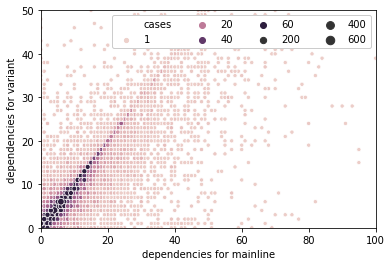

In [24]:
ax = seaborn.scatterplot(
    x='target_mainline',
    y='target_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['target_mainline', 'target_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependencies for mainline',
    xlim=(0, 100),
    ylabel='dependencies for variant',
    ylim=(0, 50),    
)

savefig(ax.figure, 'dependencies')

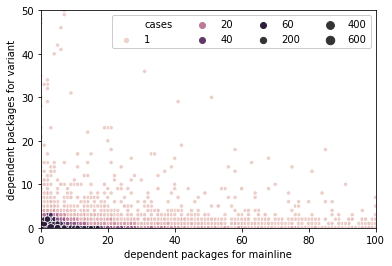

In [16]:
ax = seaborn.scatterplot(
    x='packages_mainline',
    y='packages_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['packages_mainline', 'packages_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependent packages for mainline',
    xlim=(0, 100),
    ylabel='dependent packages for variant',
    ylim=(0, 50),
)

savefig(ax.figure, 'dependents')

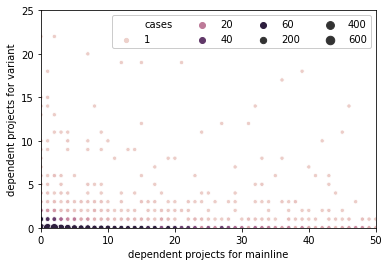

In [26]:
ax = seaborn.scatterplot(
    x='projects_mainline',
    y='projects_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['projects_mainline', 'projects_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependent projects for mainline',
    xlim=(0, 50),
    ylabel='dependent projects for variant',
    ylim=(0, 25),
)

savefig(ax.figure, 'projects')

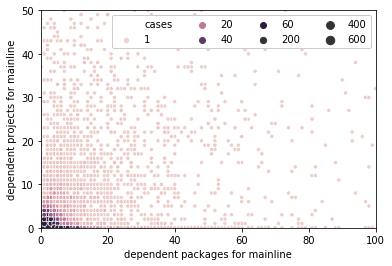

In [32]:
ax = seaborn.scatterplot(
    x='packages_mainline',
    y='projects_mainline',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .drop_duplicates('mainline')
        .groupby(['packages_mainline', 'projects_mainline'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependent packages for mainline',
    xlim=(0, 100),
    ylabel='dependent projects for mainline',
    ylim=(0, 50),
)

savefig(ax.figure, 'dependents_mainline')

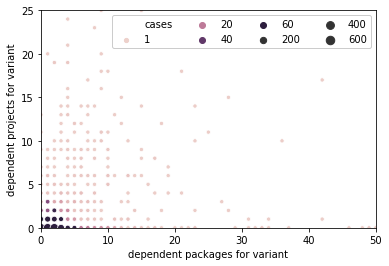

In [33]:
ax = seaborn.scatterplot(
    x='packages_variant',
    y='projects_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .drop_duplicates('variant')
        .groupby(['packages_variant', 'projects_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependent packages for variant',
    xlim=(0, 50),
    ylabel='dependent projects for variant',
    ylim=(0, 25),
)

savefig(ax.figure, 'dependents_variant')

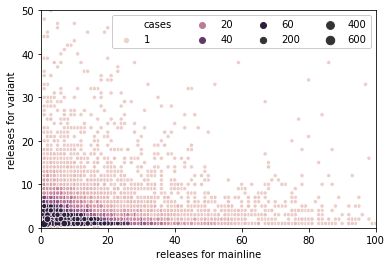

In [27]:
ax = seaborn.scatterplot(
    x='version_mainline',
    y='version_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['version_mainline', 'version_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    ),
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='releases for mainline',
    xlim=(0, 100),
    ylabel='releases for variant',
    ylim=(0, 50),
)

savefig(ax.figure, 'releases')